# Data cleaning and operationalization

I'm going to introduce a dataset of vehicle crashes in Indiana, show how to import it into pandas, and give examples of a few ways of exploring this data.

**Download the data from [here](https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true)**. I created this CSV file from [this full dataset](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/cc90589c-72d8-4d92-a5fe-73254b555c73) by filtering out many of the columns to make it small enough to easily fit in memory.

A description of the columns is [here](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/f61a5dcb-5ca3-485a-9ecf-cd3d8740dc9b?inner_span=True).

Then, I want you to form groups of 2-4 where you identify a hypothesis about this data, brainstorm a visualization or set of visualizations that would give you insight into your hypothesis, and then try to create that visualization in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This code downloads the CSV every time it's run.
# Instead, you may want to download the CSV to your computer, and load it from there
# You can use the same code, just change the path to where you download it
crash_df = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true')

## Understanding and Cleaning the data

I always start by looking at the data to make sure things look reasonable and to figure out what we are looking at.

In [3]:
crash_df

,INDIVIDUAL_MR_RECORD,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,INJNATUREDESCR,RESULTDRUGIND,COLLDTE,COLLISION_TIME,COLLISION_TIME_AM_PM,CITYDESCR,INJUREDNMB,DEADNMB,WEATHERDESCR,PRIMARYFACTORDESCR
0,903091099,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-08,03:31,PM,Indianapolis,0.0,0.0,Clear,UNSAFE BACKING
1,903084265,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-17,09:56,AM,Indianapolis,0.0,0.0,Clear,UNSAFE BACKING
2,903085095,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-18,07:54,AM,Indianapolis,0.0,0.0,Clear,FAILURE TO YIELD RIGHT OF WAY
3,903085099,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-18,10:29,AM,Indianapolis,0.0,0.0,Clear,FOLLOWING TOO CLOSELY
4,903091166,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-25,11:31,AM,Indianapolis,0.0,0.0,Clear,UNSAFE BACKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752365,903266706,NaN,NaN,NaN,NaN,NaN,2018-11-23,09:49,PM,Jeffersonville,0.0,0.0,Rain,FAILURE TO YIELD RIGHT OF WAY
752366,903265919,Driver,M,15-24 Years,NaN,NaN,2018-11-24,01:40,AM,Anderson,0.0,0.0,Rain,UNSAFE BACKING
752367,903273868,NaN,NaN,NaN,NaN,NaN,2018-12-05,02:12,PM,Mishawaka,0.0,0.0,Clear,UNSAFE LANE MOVEMENT
752368,903276031,NaN,NaN,NaN,NaN,NaN,2018-12-08,02:15,PM,Indianapolis,0.0,0.0,Clear,"OTHER (DRIVER),EXPLAIN IN NARRATIVE"


It looks like Gender and age and drug test results are all NA for the first few rows. Let's check how often they were recorded.

In [4]:
crash_df.isna().sum()

INDIVIDUAL_MR_RECORD         0
PERSONTYPEDESCR          15406
GENDERCDE               399734
AGE_GRP                 398761
INJNATUREDESCR          703796
RESULTDRUGIND           750311
COLLDTE                      0
COLLISION_TIME               0
COLLISION_TIME_AM_PM        10
CITYDESCR                  757
INJUREDNMB                 615
DEADNMB                    404
WEATHERDESCR              1070
PRIMARYFACTORDESCR        2864
dtype: int64

In [5]:
# This is the total number of rows
len(crash_df)

752370

So, it looks like the drug test column "RESULTDRUGIND" is going to be pretty useless. It's almost never recorded.

It looks like age and gender are only recorded about half the time. Let's look a littel closer into the data and see if we can figure out what's going on.

What does this data represent?

It's still not totally clear what this data represents. From the description, we can see that the Individual MR Record refers to each incident, so let's so how many of them there are:

In [6]:
len(crash_df.INDIVIDUAL_MR_RECORD.unique())

216968

Far fewer than the total rows. Let's sort by that, and see if we can figure out more.

In [7]:
crash_df.sort_values("INDIVIDUAL_MR_RECORD")

,INDIVIDUAL_MR_RECORD,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,INJNATUREDESCR,RESULTDRUGIND,COLLDTE,COLLISION_TIME,COLLISION_TIME_AM_PM,CITYDESCR,INJUREDNMB,DEADNMB,WEATHERDESCR,PRIMARYFACTORDESCR
577508,903070479,Driver,F,45-54 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
533542,903070479,Injured,M,15-24 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
237545,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
534723,903070479,Driver,M,25-34 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
240277,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630468,903384692,Driver,M,55-64 Years,NaN,NaN,2018-12-31,05:57,PM,Monon,0.0,0.0,Snow,IMPROPER PASSING
742948,903395728,Driver,M,25-34 Years,Contusion/Bruise,NaN,2018-12-25,05:46,PM,Tell City,1.0,0.0,Cloudy,RAN OFF ROAD
223505,903395728,Owner Vehicle,NaN,NaN,NaN,NaN,2018-12-25,05:46,PM,Tell City,1.0,0.0,Cloudy,RAN OFF ROAD
564332,903401646,Driver,M,55-64 Years,NaN,NaN,2018-12-26,02:08,PM,Clinton (Vermillion County),0.0,0.0,Clear,DISREGARD SIGNAL/REG SIGN


Let's look at just one incident; it looks like the drivers, any injured passengers, and the owners are all listed (although no information is given about owners).

In [8]:
crash_df.loc[crash_df.INDIVIDUAL_MR_RECORD == 903070479,]

,INDIVIDUAL_MR_RECORD,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,INJNATUREDESCR,RESULTDRUGIND,COLLDTE,COLLISION_TIME,COLLISION_TIME_AM_PM,CITYDESCR,INJUREDNMB,DEADNMB,WEATHERDESCR,PRIMARYFACTORDESCR
237545,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
240277,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
533542,903070479,Injured,M,15-24 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
534723,903070479,Driver,M,25-34 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
577508,903070479,Driver,F,45-54 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN


Let's see if this is true more broadly. It seems like the "Owner Vehicle" rows just aren't going to be much use to us at all. Let's try to get a sense of how common they are, and if they really never contain information

In [9]:
len(crash_df[crash_df.PERSONTYPEDESCR == 'Owner Vehicle'])

370651

In [10]:
crash_df[crash_df.PERSONTYPEDESCR == 'Owner Vehicle'].isna().sum()

INDIVIDUAL_MR_RECORD         0
PERSONTYPEDESCR              0
GENDERCDE               370365
AGE_GRP                 370357
INJNATUREDESCR          370644
RESULTDRUGIND           370651
COLLDTE                      0
COLLISION_TIME               0
COLLISION_TIME_AM_PM         3
CITYDESCR                  360
INJUREDNMB                 279
DEADNMB                    172
WEATHERDESCR               496
PRIMARYFACTORDESCR        1315
dtype: int64

Looks like for the data we have here, the "Owner Vehicle" entries aren't giving us any extra information, so let's just remove them.

In [11]:
crash_df = crash_df[crash_df.PERSONTYPEDESCR != 'Owner Vehicle']

## Creating measures from raw data

It is very common that the raw data isn't in the form that you need it. You need to figure out how to transform it into something usable for the statistics and/or visualizations that you want to produce.

In this case, I'm going to take the goal of understanding collisions. Each row of the data represents a person, not a collision, so if we visualized or analyzed the raw data, we could be misled, as collisions with more people would receive more weight.

So, what we need to do is to build a dataset of accidents, with datetime, weather, number injured, and number killed.

My suspicion, based on what I've seen so far, is that all of these are the same across each of the rows for a given collision. It is worth testing that assumption, though.

In [12]:
grouped = crash_df.sort_values(['COLLDTE', 'COLLISION_TIME']).groupby("INDIVIDUAL_MR_RECORD")

# For example, this is a simple test of the number of unique weather descriptions per group.
sum(grouped.WEATHERDESCR.nunique() > 1)

0

In [13]:
# We see the same for number injured and number killed
print(sum(grouped.INJUREDNMB.nunique() > 1))
print(sum(grouped.DEADNMB.nunique() > 1))

0
0


So, we can move forward with the assumption that just getting the first value is good enough for summarizing the accident.

In [14]:
# Get the first entry for each of these
coll_df = pd.DataFrame({"date" : grouped.COLLDTE.first(),
                        "time": grouped.COLLISION_TIME.first() + grouped.COLLISION_TIME_AM_PM.first(), 
                        "injured": grouped.INJUREDNMB.first(),
                        "deceased": grouped.DEADNMB.first(),
                        "weather": grouped.WEATHERDESCR.first(),
                        "accident_count": 1
                       })

coll_df.head()

,date,time,injured,deceased,weather,accident_count
INDIVIDUAL_MR_RECORD,,,,,,
903070479,2018-01-01,12:03AM,3.0,0.0,Cloudy,1
903070487,2018-01-01,12:48AM,0.0,0.0,Snow,1
903070491,2018-01-01,12:57AM,0.0,0.0,Clear,1
903070495,2018-01-01,12:45AM,0.0,0.0,Snow,1
903070497,2018-01-01,12:26AM,0.0,0.0,Snow,1


In [15]:
coll_df.isna().sum()

date                0
time                2
injured           256
deceased          175
weather           501
accident_count      0
dtype: int64

In [16]:
len(coll_df)

214019

## Visualizing our data

We finally(!) have a dataset that we understand and that we can use in order to start to answer the questions we're interested in.

As before, we need to get the date and time into a datetime object in the index.

`pd.to_datetime` tries to convert a string into a datetime. I had to add a space in between the two columns to get it to work, but this does the trick.

In [17]:
coll_df.index = pd.to_datetime(coll_df.date + ' ' + coll_df.time)

Let's look at the total number of accidents by month over 2018.

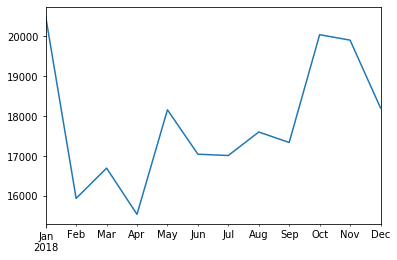

In [18]:
coll_df.resample('M').accident_count.sum().plot()

And how about the relationship between weather and accidents?

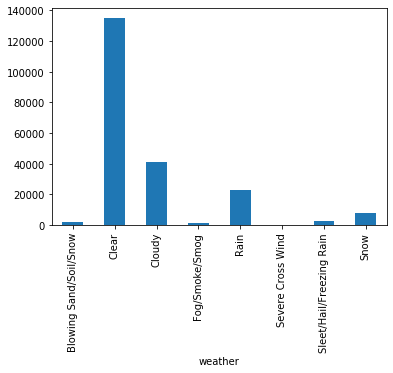

In [19]:
weather_summary = coll_df.groupby('weather').accident_count.sum()
weather_summary.plot.bar()

How could we correct for how often weather appears?

One simple way is to categorize each day by the weather that appears most often in accident reports. This obviously has some issues but it's the best we can probably do using just this data. What could be wise is to import another dataset which has historical weather data.

In [20]:
# Here, we group by date
accidents_per_day = crash_df.groupby('COLLDTE').agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('WEATHERDESCR', lambda x: x.mode()),
    # And accidents which is the number of accidents that day
    accidents = ('INDIVIDUAL_MR_RECORD', lambda x: x.nunique()))

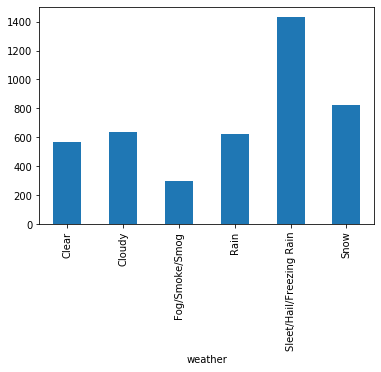

In [21]:
accidents_per_day.groupby('weather').accidents.mean().plot.bar()

## Exercises

1. How would you create the above plot in Seaborn instead?

2. Find a question that you'd like to answer with this data or the reddit data. Figure out how to filter/clean/group the data to produce the summary data that will help you to find that answer, and produce a visualization.

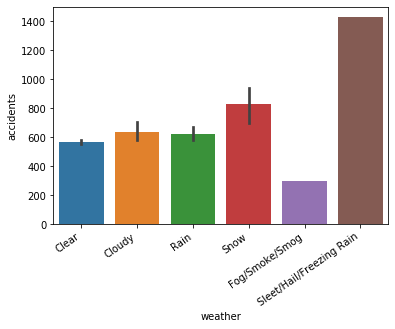

In [39]:
my_plot = sns.barplot(x = "weather", y = "accidents", data = accidents_per_day) 
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=35, ha="right")
plt.show()


#### Is there a relationship between the weather patterns and the seriousness of accidents?

In [70]:
my_crash_df = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true')
my_crash_df = my_crash_df[my_crash_df.PERSONTYPEDESCR != 'Owner Vehicle']


In [67]:
my_grouped = my_crash_df.sort_values(['COLLDTE', 'COLLISION_TIME']).groupby("INDIVIDUAL_MR_RECORD")
my_coll_df = pd.DataFrame({"date" : my_grouped.COLLDTE.first(),
                           "accident_id" : my_grouped.INDIVIDUAL_MR_RECORD.first(),
                        "time": my_grouped.COLLISION_TIME.first() + my_grouped.COLLISION_TIME_AM_PM.first(), 
                        "injured": my_grouped.INJUREDNMB.first(),
                        "deceased": my_grouped.DEADNMB.first(),
                        "weather": my_grouped.WEATHERDESCR.first(),
                        "accident_count": 1
                       })
my_coll_df.index = pd.to_datetime(my_coll_df.date + ' ' + my_coll_df.time)

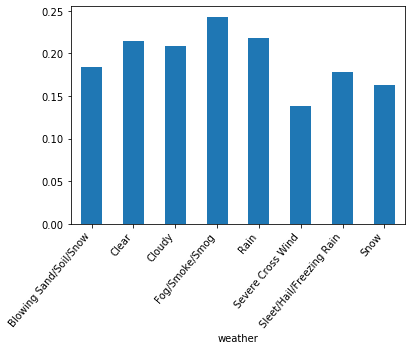

In [82]:
injured_plot = my_coll_df.groupby('weather').injured.mean().plot.bar()
injured_plot.set_xticklabels(injured_plot.get_xticklabels(), rotation = 50, ha="right")
plt.show()

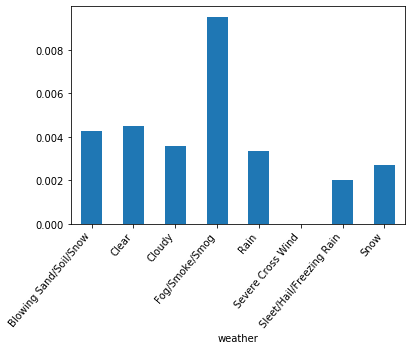

In [83]:
deceased_plot = my_coll_df.groupby('weather').deceased.mean().plot.bar()
deceased_plot.set_xticklabels(deceased_plot.get_xticklabels(), rotation = 50, ha="right")
plt.show()